In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#generate basic sequence
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise
    return series[..., np.newaxis].astype(np.float32)

In [12]:
#function call
n_steps = 50
series = generate_time_series(10000, n_steps +1 ) # shape - [batch size, time steps, 1] ... 1 because univariate data (just one datapoint)

In [14]:
#split the data
x_train = series[:7000]
y_train = series[:7000, -1]
x_valid = series[7000:9000]
y_valid = series[7000:9000, -1]
x_test = series[9000:]
y_test = series[9000:, -1]

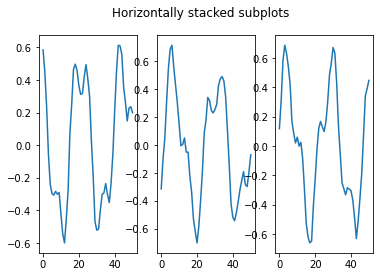

In [15]:
#plot the first 3 series
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x_train[0])
ax2.plot(x_train[1])
ax3.plot(x_train[2])

In [16]:
#shape of data
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(7000, 51, 1)
(7000, 1)
(2000, 51, 1)
(2000, 1)
(1000, 51, 1)
(1000, 1)


In [17]:
model = keras.models.Sequential([
keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
keras.layers.SimpleRNN(20),
keras.layers.Dense(1)
])

In [18]:
model.compile(loss="mse", optimizer="Adam", metrics=["mae"])

In [19]:
model.fit(x_train, y_train, epochs=10)

Train on 7000 samples
Epoch 1/10
7000/7000 [==============================] - 14s 2ms/sample - loss: 0.0197 - mae: 0.0810
Epoch 2/10
7000/7000 [==============================] - 11s 2ms/sample - loss: 8.5815e-04 - mae: 0.0231
Epoch 3/10
7000/7000 [==============================] - 11s 2ms/sample - loss: 3.2721e-04 - mae: 0.0143
Epoch 4/10
7000/7000 [==============================] - 13s 2ms/sample - loss: 1.7615e-04 - mae: 0.0105
Epoch 5/10
7000/7000 [==============================] - 13s 2ms/sample - loss: 1.2754e-04 - mae: 0.0089
Epoch 6/10
7000/7000 [==============================] - 13s 2ms/sample - loss: 9.4368e-05 - mae: 0.0077
Epoch 7/10
7000/7000 [==============================] - 12s 2ms/sample - loss: 7.7236e-05 - mae: 0.0070
Epoch 8/10
7000/7000 [==============================] - 12s 2ms/sample - loss: 6.1014e-05 - mae: 0.0062
Epoch 9/10
7000/7000 [==============================] - 12s 2ms/sample - loss: 5.1013e-05 - mae: 0.0057
Epoch 10/10
7000/7000 [=======================